# Pertanyaan Bisnis
- Bagaimana perbedaan angka kasus aktif antara pulau?
- Bagaimana densitas penduduk memengaruhi tingkat kematian atau pemulihan?

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [2]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
data.shape

(31822, 38)

In [5]:
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [6]:
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [7]:
data.duplicated().sum()

np.int64(0)

# Data Preprocessing

In [8]:
data = data.drop(columns=['City or Regency'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  Province                     30893 non-null  object 
 13  Country         

In [9]:
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
Longitude                          0
L

In [10]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2319 entries, 100 to 31812
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2319 non-null   object 
 1   Location ISO Code            2319 non-null   object 
 2   Location                     2319 non-null   object 
 3   New Cases                    2319 non-null   int64  
 4   New Deaths                   2319 non-null   int64  
 5   New Recovered                2319 non-null   int64  
 6   New Active Cases             2319 non-null   int64  
 7   Total Cases                  2319 non-null   int64  
 8   Total Deaths                 2319 non-null   int64  
 9   Total Recovered              2319 non-null   int64  
 10  Total Active Cases           2319 non-null   int64  
 11  Location Level               2319 non-null   object 
 12  Province                     2319 non-null   object 
 13  Country             

### Exploring Data

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode the 'Island' column
label_encoder = LabelEncoder()
data['Island_encoded'] = label_encoder.fit_transform(data['Island'].astype(str))

# Select relevant columns for clustering
clustering_data = data[['Total Active Cases', 'Island_encoded']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data)

# Display the first few rows of the dataframe with the new 'Cluster' column
data[['Total Active Cases', 'Island', 'Cluster']].head()

,Total Active Cases,Island,Cluster
100,-1,Jawa,1
111,-1,Jawa,1
123,-1,Jawa,1
152,-1,Jawa,1
167,-1,Jawa,1


In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

df = data[['Population Density', 'Total Deaths', 'Total Recovered', 'Total Cases']].dropna()

# Hitung tingkat kematian dan pemulihan
df['Case Fatality Rate'] = (df['Total Deaths'] / df['Total Cases']) * 100
df['Case Recovered Rate'] = (df['Total Recovered'] / df['Total Cases']) * 100

# Variabel independen dan dependen
X = df[['Population Density']]
y_fatality = df['Case Fatality Rate']
y_recovery = df['Case Recovered Rate']

# Regresi Linear untuk tingkat kematian
model_fatality = LinearRegression()
model_fatality.fit(X, y_fatality)
y_pred_fatality = model_fatality.predict(X)

# Regresi Linear untuk tingkat pemulihan
model_recovery = LinearRegression()
model_recovery.fit(X, y_recovery)
y_pred_recovery = model_recovery.predict(X)

# Data Visualization

## 1. Bagaimana perbedaan angka kasus aktif antara pulau?

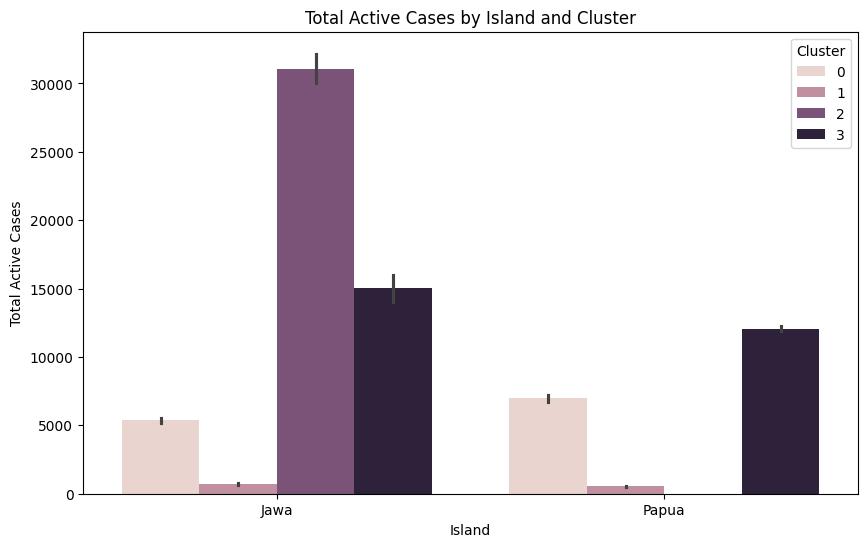

In [14]:
# Buat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Island', y='Total Active Cases', hue='Cluster', data=data)
plt.title('Total Active Cases by Island and Cluster')
plt.xlabel('Island')
plt.ylabel('Total Active Cases')
plt.legend(title='Cluster')
plt.show()

## 2. Bagaimana densitas penduduk memengaruhi tingkat kematian atau pemulihan?

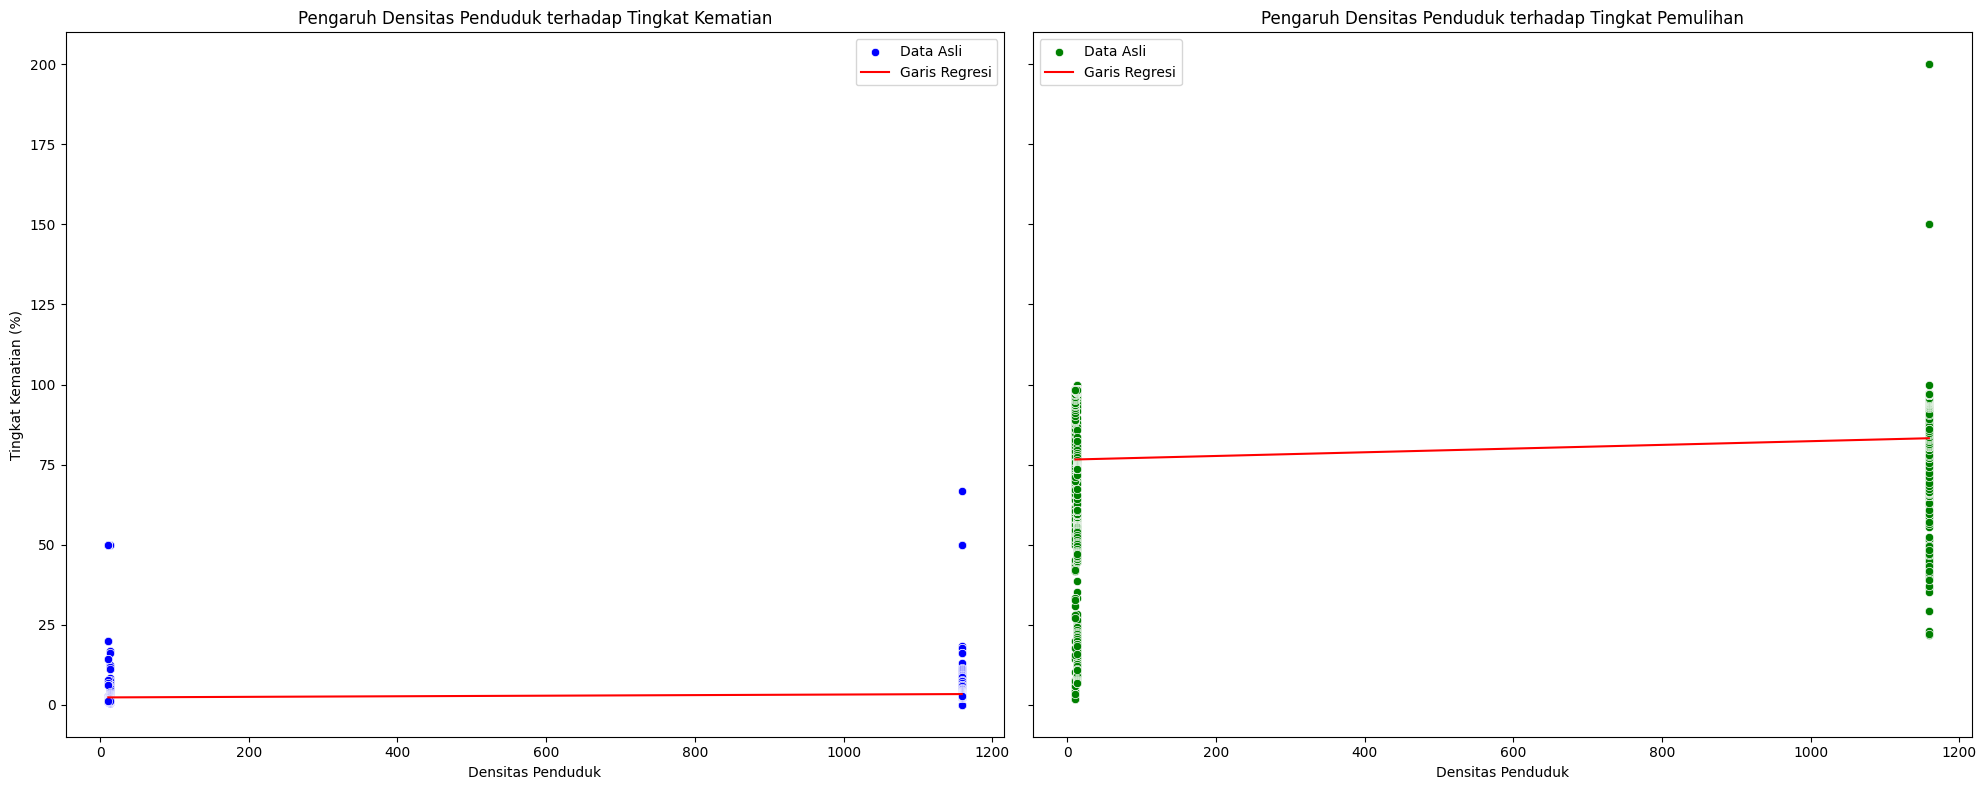

In [15]:
# Visualisasi gabungan
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Scatterplot dan regresi untuk tingkat kematian
sns.scatterplot(ax=axes[0], x='Population Density', y='Case Fatality Rate', data=df, color='blue', label='Data Asli')
axes[0].plot(df['Population Density'], y_pred_fatality, color='red', label='Garis Regresi')
axes[0].set_title('Pengaruh Densitas Penduduk terhadap Tingkat Kematian')
axes[0].set_xlabel('Densitas Penduduk')
axes[0].set_ylabel('Tingkat Kematian (%)')
axes[0].legend()

# Scatterplot dan regresi untuk tingkat pemulihan
sns.scatterplot(ax=axes[1], x='Population Density', y='Case Recovered Rate', data=df, color='green', label='Data Asli')
axes[1].plot(df['Population Density'], y_pred_recovery, color='red', label='Garis Regresi')
axes[1].set_title('Pengaruh Densitas Penduduk terhadap Tingkat Pemulihan')
axes[1].set_xlabel('Densitas Penduduk')
axes[1].legend()

plt.tight_layout()
plt.show()


In [17]:
data.to_csv('studi-kasus-covid-daming.csv', index=False)